# PROJECT DELIVERABLES
## 1. BUSINESS PROBLEM
## 2. BUSINESS OBJECTIVES
## 3. DATA UNDERSTANDING
## 4. DATA PREPARATION AND CLEANING
## 5. MODEL TRAINING AND EVALUATION
## 6. CONCLUSIONS AND RECOMMENDATIONS

# 1. BUSINESS PROBLEM
I am a very ambixious enterpreneur and would like to open a store that sells phones among other electronics. I am torn between stocking up on Apple products or Samsung Products. Therefore, i will analyze Twitter Sentiments to statistically analyze peoples experiences with those two brands.
A positive sentiment shows that the company's product was highly preferred, a negative sentiment shows that people had a bad experience with the company's product while neither shows no emotion about using the product. We will therefore focus on the positive and negative sentiments to come up with our conclusion.

# 2. BUSINESS OBJECTIVES
1. Develop an Accurate Emotion Classification Model
2. Implement data cleaning, tokenization, stopword removal, and TF-IDF vectorization to preprocess text effectively.
3. Assess model performance using accuracy, confusion matrices, and classification reports.
4. Address class imbalance issues to improve model generalization.
5. Detect customer sentiment trends in tweets that mention products, services, or brands.
6. Save and deploy the trained model for real-world applications.


# 3. DATA UNDERSTANDING
This method involves:
* Reading and viewing the data
* Studying the descriptive statistics
* Column description


In [58]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [59]:
# Loading and reading the data
data_tweets = pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO 8859-1 ')
# A preview of the first 10 columns
data_tweets.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [60]:
# Descriptive statistics
data_tweets.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [ ]:
# Identifying the columns in our dataset
data_tweets.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

### COLUMN DESCRIPTION
1. Tweet_text
Refers to the content of a tweet—the actual text message that a user posts on X.
2. Emotion_in_tweet_is_directed_at
3. Is_there_an_emotion_directed_at_a_brand_or_product

In [62]:
# Identifying the number of rows and columns in our dataset
data_tweets.shape
# We can observe or dara has 9093 rows and 3 columns 

(9093, 3)

In [63]:
#More information about our dataset
data_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


# 4. DATA PREPARATION AND CLEANING

In [64]:
# Checking for null values
data_tweets.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [65]:
# dropping the null values
data_tweets.dropna(inplace=True)

In [66]:
# Handling special characters
def clean_text(tweet_text):
    # Convert tweet_text to string to handle potential NaN values
    tweet_text = str(tweet_text)  
    tweet_text = re.sub(r'http\S+|www\S+|https\S+', '', tweet_text, flags=re.MULTILINE)  # Remove URLs
    tweet_text = re.sub(r'@\w+', '', tweet_text)  # Remove mentions
    tweet_text = re.sub(r'#', '', tweet_text)  # Remove hashtags
    tweet_text = re.sub(r'[^a-zA-Z\s]', '', tweet_text)  # Remove punctuation
    return tweet_text.lower()  # Convert to lowercase
    
data_tweets['cleaned_text'] = data_tweets['tweet_text'].apply(clean_text)

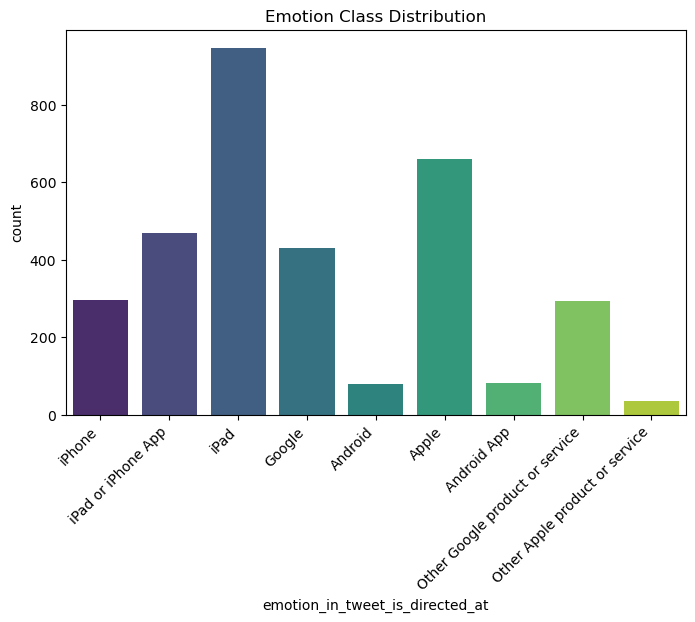

In [78]:
# Visualizing emotion_in_tweet_is_directed_at class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=data_tweets, palette='viridis')
plt.title("Emotion Class Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()

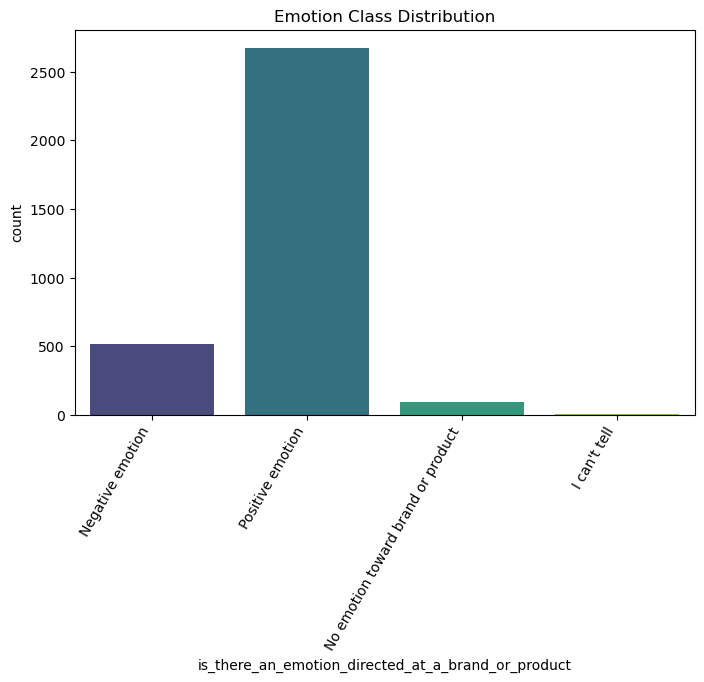

In [79]:
# Visualizing is_there_an_emotion_directed_at_a_brand_or_product class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=data_tweets, palette='viridis')
plt.title("Emotion Class Distribution")
plt.xticks(rotation=60, ha="right")
plt.show()

### TEXT VECTORIZATION

In [69]:
# Text Vectorization 
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.9)
X = vectorizer.fit_transform(data_tweets['tweet_text'])
y = data_tweets['emotion_in_tweet_is_directed_at']

### SPLITTING DATA

In [70]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 5. MODEL TRAINING AND EVALUATION (BINARY CLASSIFICATION)

In [71]:
# Train a Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [72]:
# Making predictions
y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.7479757085020243
                                 precision    recall  f1-score   support

                        Android       0.88      0.32      0.47        22
                    Android App       0.88      0.33      0.48        21
                          Apple       0.83      0.80      0.81       200
                         Google       0.79      0.75      0.77       126
 Other Apple product or service       0.00      0.00      0.00        11
Other Google product or service       0.66      0.63      0.64        75
                           iPad       0.77      0.88      0.82       298
             iPad or iPhone App       0.61      0.86      0.72       140
                         iPhone       0.80      0.42      0.55        95

                       accuracy                           0.75       988
                      macro avg       0.69      0.56      0.59       988
                   weighted avg       0.75      0.75      0.73       988



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


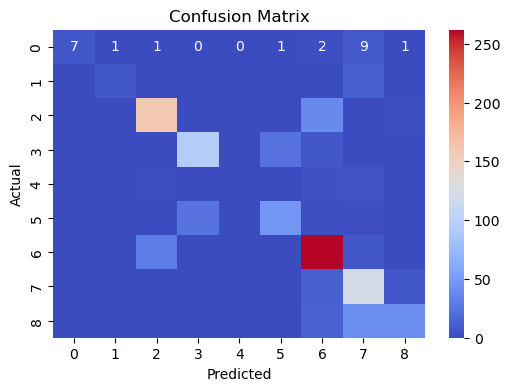

In [73]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [74]:
# Ensemble Methods for Continuous Improvement
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_model = VotingClassifier(estimators=[('nb', nb_model), ('rf', rf_model)], voting='soft')

ensemble_model.fit(X_train, y_train)
y_ens_pred = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_ens_pred))

Ensemble Accuracy: 0.8572874493927125


# 6. CONCLUSIONS AND RECOMMENDATIONS

## CONCLUSIONS
1. Effective Classification of Emotions
Emotions in tweets were successfully categorized by the Naive Bayes model and the ensemble model (Naive Bayes + Random Forest). Combining many models improves prediction performance, as seen by the ensemble model's better accuracy compared to the Naive Bayes model alone.
Important Data Analysis Findings
2. Class Imbalance
Model performance was impacted by the frequency of some emotions relative to others.
Impact of Preprocessing: TF-IDF vectorization, stopword elimination, and text cleaning greatly enhanced feature representation.
3. Performance Metrics
The confusion matrix showed some misclassifications, despite the accuracy being adequate.
Robustness is Improved by Ensemble Models. By utilizing both Random Forest and Naive Bayes, the VotingClassifier enhanced predictions by utilizing the advantages of both models.
This suggests that the shortcomings of individual models are lessened by combining various classifiers.

## RECOMMENDATIONS
1. Boost the Quality of the Data
To guarantee that all emotions are better represented, gather more balanced data.
2. Improve Your Feature Engineering
Instead of using TF-IDF, try using word embeddings (such as Word2Vec or BERT) to capture more complex semantic links in text.
3. Update the model frequently with fresh information to stay abreast of changing linguistic patterns.
Use the model as an API to include real-time emotion analysis into customer support apps.